In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
dataset = pd.read_csv('social-network-ads.csv')
dataset.sample(10)

,Age,EstimatedSalary,Purchased
370,60,46000,1
22,48,41000,1
291,49,89000,1
262,55,125000,1
131,33,31000,0
48,30,135000,1
245,51,146000,1
161,25,90000,0
201,49,74000,0
269,40,61000,0


In [3]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


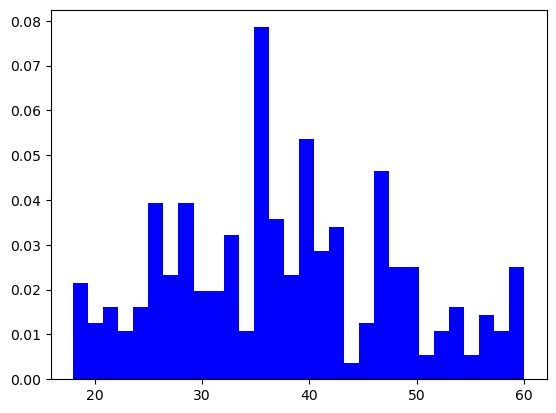

In [4]:
plt.hist(dataset['Age'], bins=30, density=True, color='blue')
plt.show()

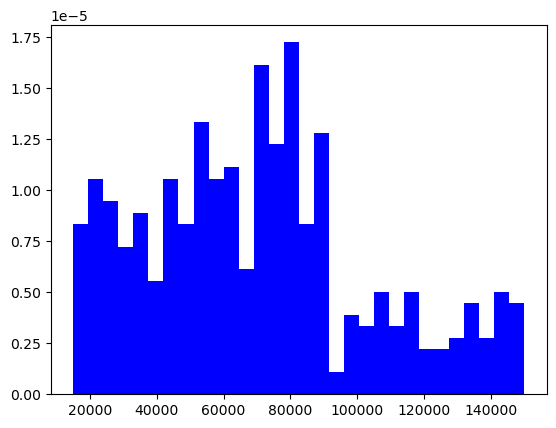

In [5]:
plt.hist(dataset['EstimatedSalary'], bins=30, density=True, color='blue')
plt.show()

In [6]:
df=dataset.copy()

In [7]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


C:\Users\kamel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


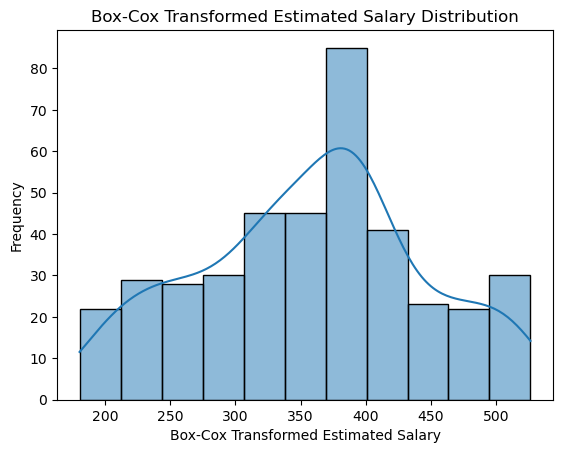

In [8]:
from scipy import stats

# Apply Box-Cox transformation
df['BoxCox_EstimatedSalary'], fitted_lambda = stats.boxcox(df['EstimatedSalary'] + 1)  # Adding 1 to avoid issues with zero values

# Visualize the distribution after Box-Cox transformation
sns.histplot(df['BoxCox_EstimatedSalary'], kde=True)
plt.title('Box-Cox Transformed Estimated Salary Distribution')
plt.xlabel('Box-Cox Transformed Estimated Salary')
plt.ylabel('Frequency')
plt.show()


In [9]:
df

,Age,EstimatedSalary,Purchased,BoxCox_EstimatedSalary
0,19,19000,0,201.638641
1,35,20000,0,206.516385
2,26,43000,0,294.847716
3,27,57000,0,336.070152
4,19,76000,0,384.051078
...,...,...,...,...
395,46,41000,1,288.395815
396,51,23000,1,220.407724
397,50,20000,1,206.516385
398,36,33000,0,260.721204


In [10]:
df=df.drop(columns=['EstimatedSalary'])

In [11]:
df.describe()

,Age,Purchased,BoxCox_EstimatedSalary
count,400.000000,400.000000,400.000000
mean,37.655000,0.357500,357.274050
std,10.482877,0.479864,86.129724
min,18.000000,0.000000,180.592021
25%,29.750000,0.000000,294.847716
50%,37.000000,0.000000,369.679375
75%,46.000000,1.000000,411.062697
max,60.000000,1.000000,526.266817


In [14]:
df.drop_duplicates(inplace=True)


In [15]:
X = df[['Age','BoxCox_EstimatedSalary']]
X

,Age,BoxCox_EstimatedSalary
0,19,201.638641
1,35,206.516385
2,26,294.847716
3,27,336.070152
4,19,384.051078
...,...,...
395,46,288.395815
396,51,220.407724
397,50,206.516385
398,36,260.721204


In [16]:
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 367, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_train

array([[-0.04314152, -1.10076182],
       [ 2.02833611,  0.59471567],
       [-0.70224804,  1.0343259 ],
       [ 0.05101656,  1.14286326],
       [-0.98472226,  0.78549638],
       [ 0.71012308, -1.40940783],
       [-0.60808996, -2.00441937],
       [ 0.89843922, -1.71205712],
       [ 0.80428115, -1.60632275],
       [ 1.46338767,  0.18284409],
       [ 0.9925973 , -1.01922184],
       [ 1.55754574,  0.96788731],
       [-1.26719648,  0.61906068],
       [-1.83214493,  0.54557439],
       [ 1.18091345,  0.59471567],
       [ 0.80428115, -0.78866115],
       [ 0.33349078,  0.39433898],
       [ 1.08675537, -0.86336149],
       [ 1.46338767,  0.44540961],
       [ 0.33349078,  0.18284409],
       [-0.41977381,  0.1002836 ],
       [ 0.9925973 , -1.27224302],
       [ 0.2393327 , -0.5756606 ],
       [-1.64382878, -0.50795213],
       [ 1.27507152,  1.82011717],
       [ 0.80428115, -1.31707648],
       [ 1.93417804, -0.9014865 ],
       [ 0.05101656,  0.39433898],
       [-0.04314152,

In [22]:
X_test = sc.transform(X_test)
X_test

array([[ 1.93417804,  0.90040772],
       [-0.98472226,  0.64325873],
       [-0.79640611,  0.39433898],
       [ 1.84001997, -0.15971757],
       [-0.51393189,  1.24881962],
       [-1.73798685, -1.40940783],
       [-1.07888033, -1.88197115],
       [ 0.33349078, -0.44171714],
       [-0.51393189,  1.61132081],
       [-0.41977381, -1.18501086],
       [ 0.80428115,  0.59471567],
       [-0.98472226, -1.88197115],
       [ 0.42764885,  0.64325873],
       [-0.89056419,  0.36854556],
       [-0.70224804,  0.61906068],
       [ 0.9925973 , -1.22823514],
       [-1.73798685, -1.76706593],
       [ 1.18091345, -0.97939304],
       [ 1.55754574,  0.1280149 ],
       [-1.07888033, -1.01922184],
       [-0.23145767, -0.01286628],
       [-1.07888033,  1.26971627],
       [-0.32561574,  1.14286326],
       [ 2.02833611,  0.2900919 ],
       [ 0.42764885,  1.05624856],
       [ 1.65170382,  1.51338318],
       [ 0.2393327 ,  1.0343259 ],
       [ 0.80428115,  0.23685854],
       [ 0.42764885,

In [23]:
from sklearn.svm import SVC

In [24]:
classifier = SVC(kernel='linear', C=0.1, random_state=0)

In [25]:
classifier.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=0)

In [26]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[51  5]
 [ 8 28]]


0.8586956521739131

In [28]:
from sklearn.svm import SVC

In [29]:
classifier = SVC(kernel = 'rbf', random_state = 0,C=0.1, gamma='scale')

In [30]:
classifier.fit(X_train, y_train)

SVC(C=0.1, random_state=0)

In [31]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[51  5]
 [ 3 33]]


0.9130434782608695

In [84]:
from sklearn.svm import SVC

In [85]:
classifier = SVC(kernel = 'poly', random_state = 0,degree=1,C=0.1)

In [86]:
classifier.fit(X_train, y_train)

SVC(C=0.1, degree=1, kernel='poly', random_state=0)

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  1]
 [12 25]]


0.87

In [89]:
classifier = SVC(kernel = 'sigmoid', random_state = 42,C=0.1, gamma='scale')

In [90]:
classifier.fit(X_train, y_train)

SVC(C=0.1, kernel='sigmoid', random_state=42)

In [91]:
y_pred = classifier.predict(X_test)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60  3]
 [18 19]]


0.79

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [106]:
y_pred = classifier.predict(X_test)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[58  5]
 [ 1 36]]


0.94

In [97]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

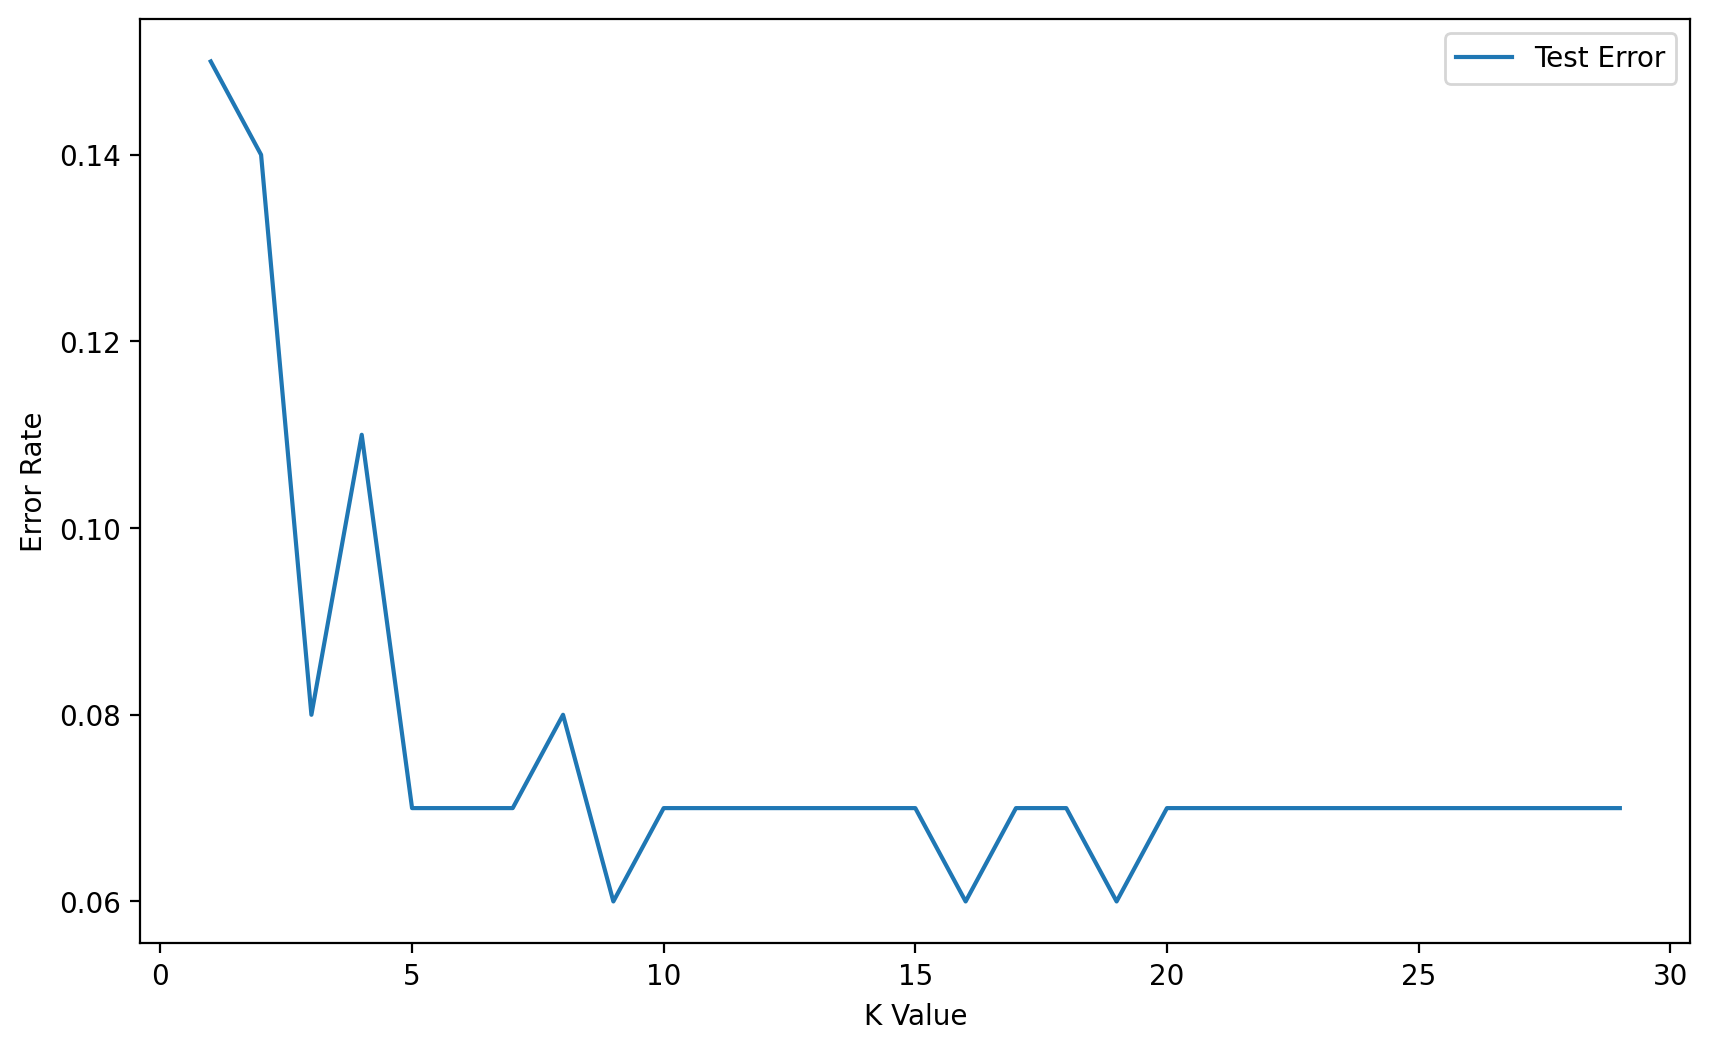

In [98]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")